<a href="https://colab.research.google.com/github/09manojkumars/Loan_Default_Preducation/blob/main/Loan_Default_Preductation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

In [109]:
df = pd.read_csv('/content/loan_default_prediction_project (1).csv')

In [110]:
df

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,Male,71266.105175,Employed,Suburban,639,0.007142,27060.188289,Non-Default,13068.330587,18.185533,59
1,46,NaN,37283.054601,Employed,Suburban,474,0.456731,40192.994312,Default,15159.338369,11.727471,69
2,32,Male,69567.036392,Employed,Urban,750,0.329231,25444.262759,Default,6131.287659,17.030462,69
3,60,Female,72016.087392,Employed,Rural,435,0.052482,3122.213749,Non-Default,37531.880251,16.868949,26
4,25,Female,32161.988250,Unemployed,Suburban,315,0.450236,19197.350445,Non-Default,41466.397989,18.891582,66
...,...,...,...,...,...,...,...,...,...,...,...,...
995,22,Female,98081.105862,Unemployed,Urban,727,0.961613,3586.586891,Non-Default,41473.241896,3.700707,23
996,40,Male,30044.017181,Employed,Rural,416,0.775082,32993.493341,Default,48942.588814,12.932559,62
997,27,Female,21355.813191,Unemployed,Rural,806,0.621937,21579.216456,Default,34010.252873,3.825633,55
998,61,Female,81612.656941,NaN,Rural,845,0.606793,38180.153354,Default,17504.010506,13.263354,27


In [111]:
rows, columns = df.shape
print(rows)
print('Columns:',columns)

1000
Columns: 12


In [112]:
#droping NaN values in GENDER
df = df.dropna(subset=['Gender']).reset_index(drop=True)

In [113]:
df['Gender'] = df['Gender'].map({'Male':0 , 'Female':1})
df['Employment_Status'] = df['Employment_Status'].map({'Employed':0 , 'Unemployed':1})
df['Location']= df['Location'].map({'Suburban':0 , 'Urban': 1, 'Rural': 2})

In [114]:
#Droping NaN values in Employment_Status
df = df.dropna(subset=['Employment_Status']).reset_index(drop=True)

In [115]:
#Droping NaN values in Location
df = df.dropna(subset=['Location']).reset_index(drop=True)

In [116]:
#converting Target columns from categorical to numerical
df['Loan_Status'] = df['Loan_Status'].map({'Default' : 1 , 'Non-Default' : 0})

In [117]:
df.isnull().sum()

,0
Age,0
Gender,0
Income,0
Employment_Status,0
Location,0
Credit_Score,0
Debt_to_Income_Ratio,0
Existing_Loan_Balance,0
Loan_Status,0
Loan_Amount,0


In [118]:
df.isnull().sum()

,0
Age,0
Gender,0
Income,0
Employment_Status,0
Location,0
Credit_Score,0
Debt_to_Income_Ratio,0
Existing_Loan_Balance,0
Loan_Status,0
Loan_Amount,0


In [119]:
df.columns

Index(['Age', 'Gender', 'Income', 'Employment_Status', 'Location',
       'Credit_Score', 'Debt_to_Income_Ratio', 'Existing_Loan_Balance',
       'Loan_Status', 'Loan_Amount', 'Interest_Rate', 'Loan_Duration_Months'],
      dtype='object')

In [120]:
# first visvilization of the top head data
df.head()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
0,56,0,71266.105175,0.0,0,639,0.007142,27060.188289,0,13068.330587,18.185533,59
1,32,0,69567.036392,0.0,1,750,0.329231,25444.262759,1,6131.287659,17.030462,69
2,60,1,72016.087392,0.0,2,435,0.052482,3122.213749,0,37531.880251,16.868949,26
3,25,1,32161.988250,1.0,0,315,0.450236,19197.350445,0,41466.397989,18.891582,66
4,38,1,24907.970169,0.0,1,632,0.254749,22222.047884,0,40858.167955,17.295705,28


In [121]:
df.isnull().sum()

,0
Age,0
Gender,0
Income,0
Employment_Status,0
Location,0
Credit_Score,0
Debt_to_Income_Ratio,0
Existing_Loan_Balance,0
Loan_Status,0
Loan_Amount,0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722 entries, 0 to 721
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    722 non-null    int64  
 1   Gender                 722 non-null    int64  
 2   Income                 722 non-null    float64
 3   Employment_Status      722 non-null    float64
 4   Location               722 non-null    int64  
 5   Credit_Score           722 non-null    int64  
 6   Debt_to_Income_Ratio   722 non-null    float64
 7   Existing_Loan_Balance  722 non-null    float64
 8   Loan_Status            722 non-null    int64  
 9   Loan_Amount            722 non-null    float64
 10  Interest_Rate          722 non-null    float64
 11  Loan_Duration_Months   722 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 67.8 KB


In [123]:
#checking if there are any repeated columns
repeated_cols = df.T[df.T.duplicated()]
print(repeated_cols)

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]
Index: []

[0 rows x 722 columns]


In [124]:
#checking if there are any repeated Rows
repeated_rows= df[df.duplicated()]
print(repeated_rows)

Empty DataFrame
Columns: [Age, Gender, Income, Employment_Status, Location, Credit_Score, Debt_to_Income_Ratio, Existing_Loan_Balance, Loan_Status, Loan_Amount, Interest_Rate, Loan_Duration_Months]
Index: []


In [125]:
#Analysing Numerical data

In [126]:
#checking the data distribution.
df.describe()

,Age,Gender,Income,Employment_Status,Location,Credit_Score,Debt_to_Income_Ratio,Existing_Loan_Balance,Loan_Status,Loan_Amount,Interest_Rate,Loan_Duration_Months
count,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000,722.000000
mean,41.375346,0.501385,60418.806376,0.350416,0.995845,565.635734,0.493177,25240.507532,0.204986,28020.466437,11.584256,42.085873
std,13.381487,0.500345,24817.328877,0.477431,0.818465,162.736265,0.295663,14053.151545,0.403971,13006.456540,4.856194,17.347580
min,18.000000,0.000000,20010.775440,0.000000,0.000000,250.000000,0.000748,80.059377,0.000000,5071.073949,3.003148,12.000000
25%,30.250000,0.000000,40815.204609,0.000000,0.000000,425.500000,0.241725,13533.317362,0.000000,16980.644558,7.652365,27.000000
50%,42.000000,1.000000,60035.858353,0.000000,1.000000,555.000000,0.498351,25430.284561,0.000000,28334.760266,11.567192,42.000000
75%,52.750000,1.000000,80233.177056,1.000000,2.000000,714.000000,0.736376,36859.014854,0.000000,39643.375068,15.469459,57.750000
max,64.000000,1.000000,150000.000000,1.000000,2.000000,849.000000,0.999849,49987.578171,1.000000,49969.232069,19.991438,71.000000


<function matplotlib.pyplot.show(close=None, block=None)>

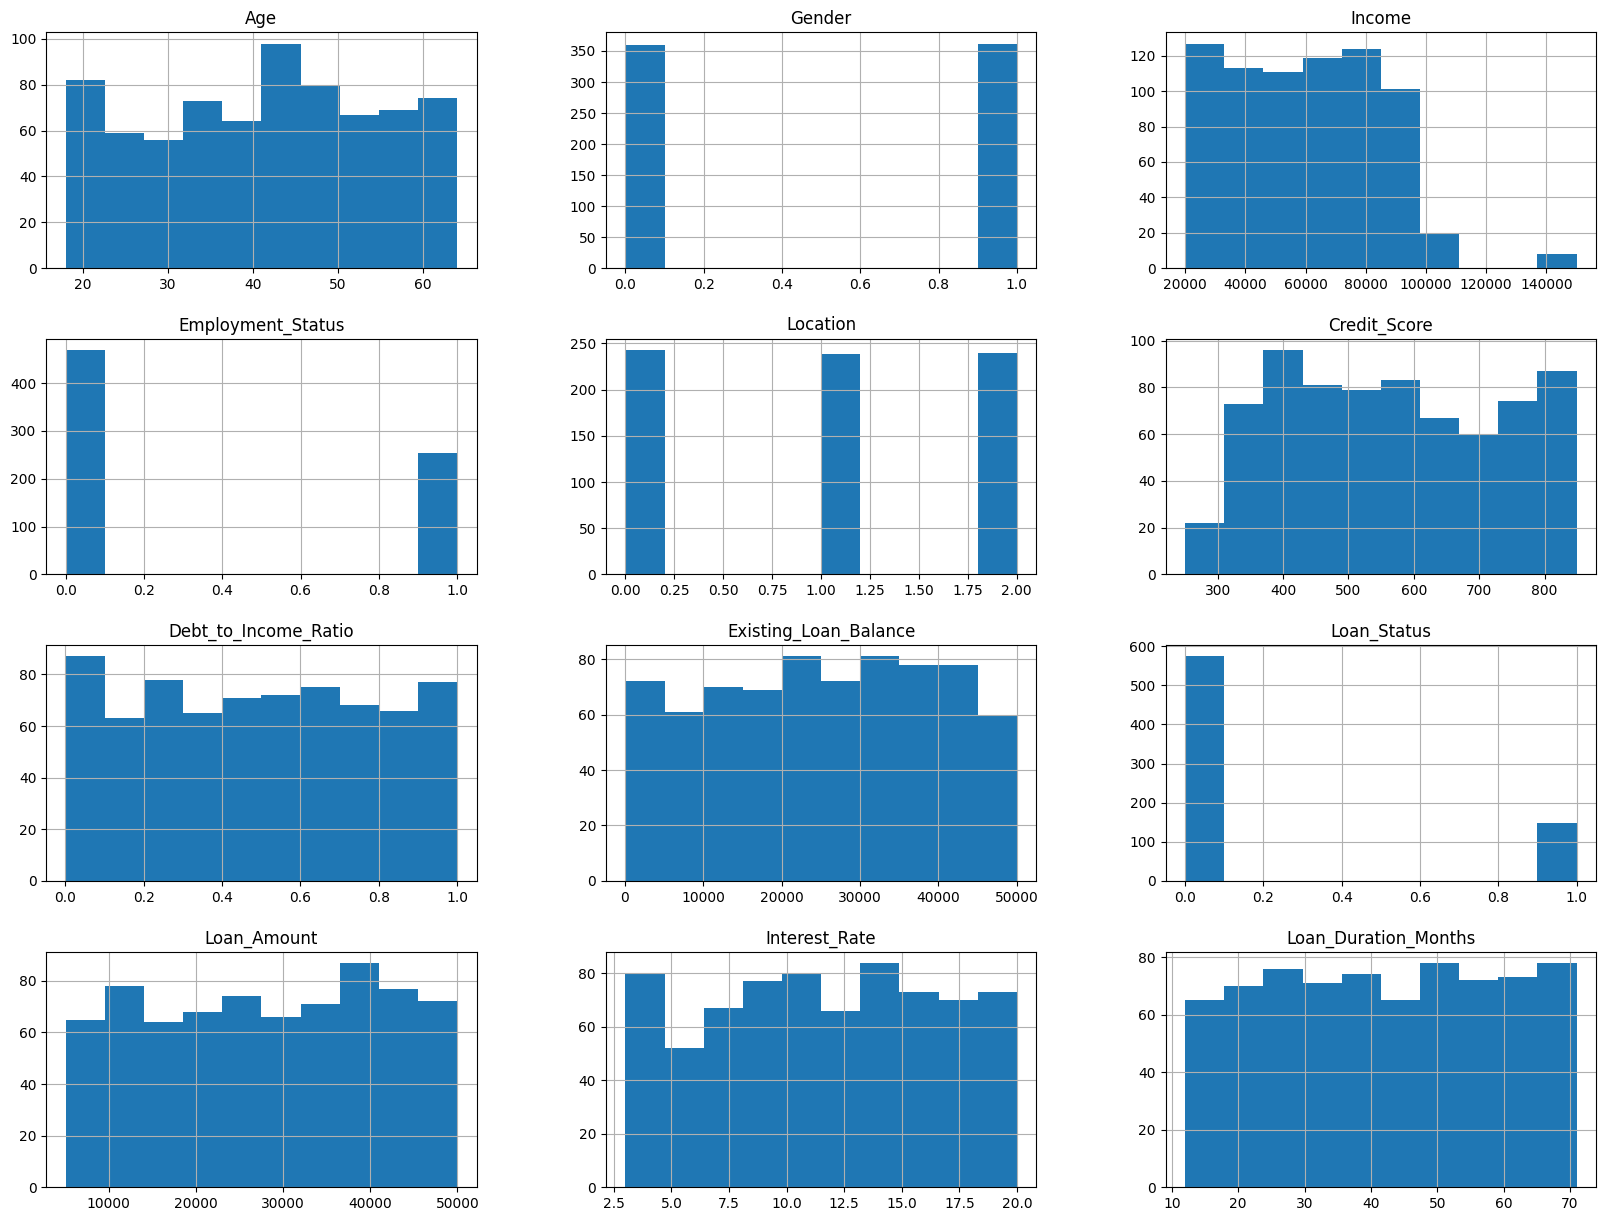

In [127]:
df.hist(figsize=(20,15))
plt.show

In [128]:
#checking the count of the target variable.
df["Loan_Status"].value_counts()

,count
Loan_Status,
0,574
1,148


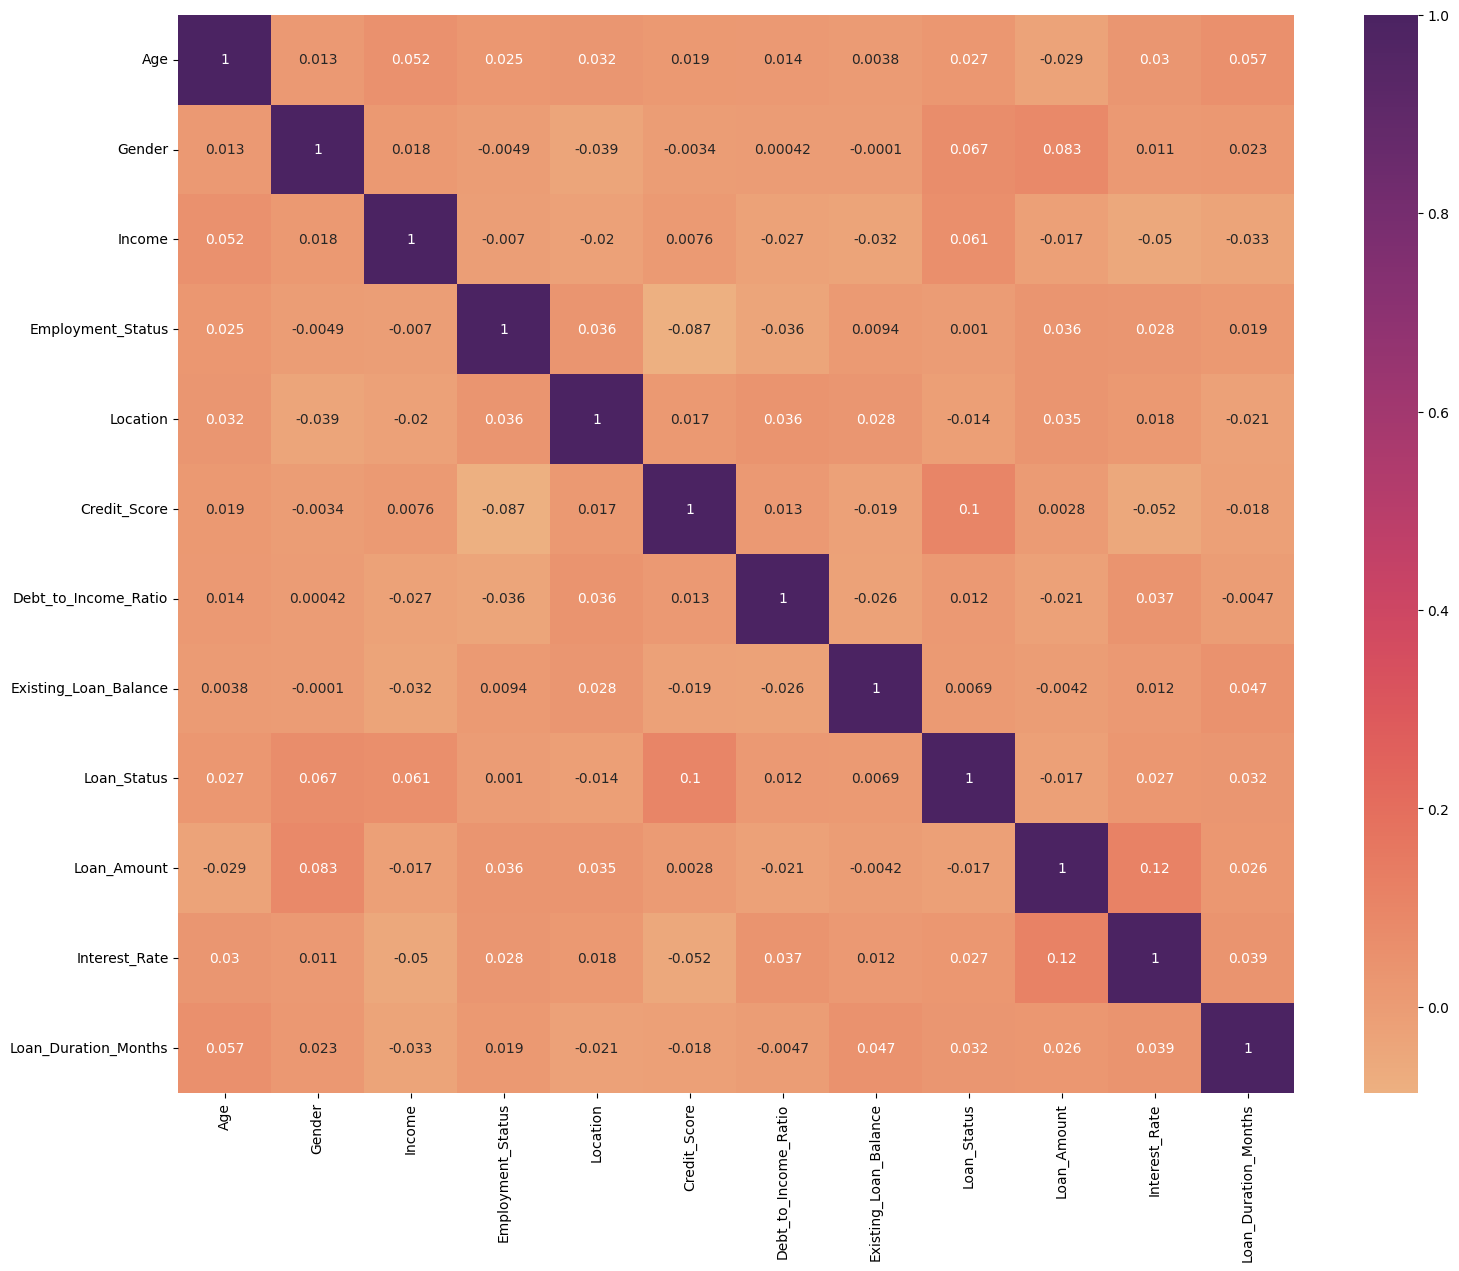

In [129]:
#ploting the correlation
fig, ax = plt.subplots(figsize=(18,14))
corr_matrix = df.corr()
corr_heatmap = sns.heatmap(corr_matrix,cmap="flare" ,annot=True, ax=ax)
plt.show()

In [130]:
#Analyzing Categorical Features

In [131]:
def categorical_valcount_hist(feature):
    print(df[feature].value_counts())
    fig, ax = plt.subplots( figsize = (9,9) )
    sns.countplot(x=feature, ax=ax, data=df)
    plt.show()

Gender
1    362
0    360
Name: count, dtype: int64


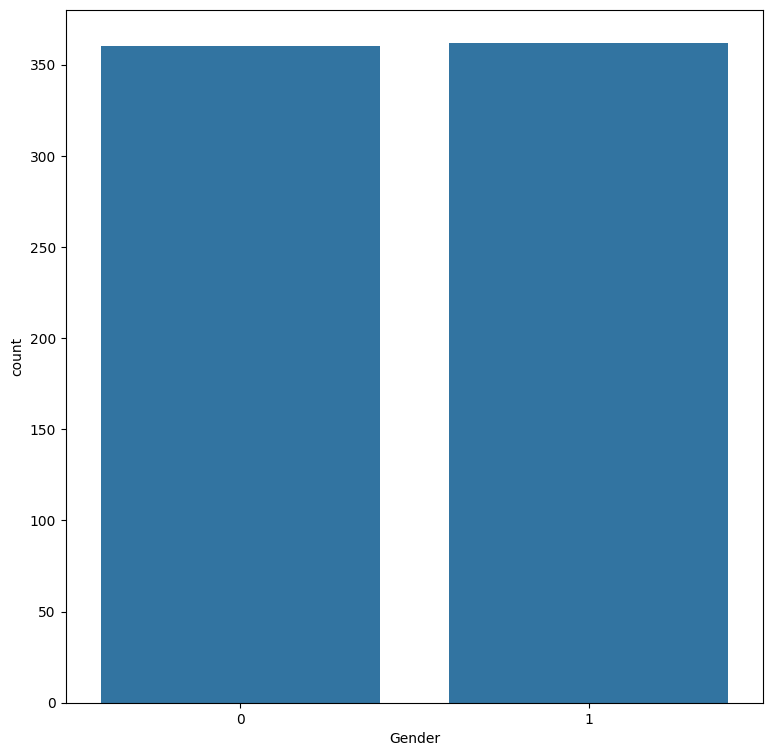

In [132]:
# Male & Female
categorical_valcount_hist("Gender")

Employment_Status
0.0    469
1.0    253
Name: count, dtype: int64


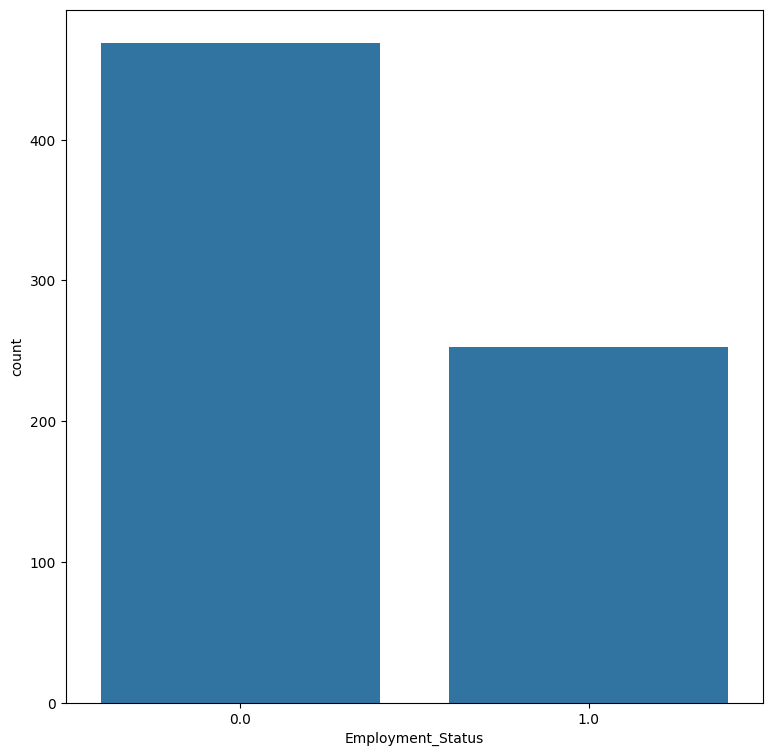

In [133]:
#Employe_Status
categorical_valcount_hist("Employment_Status")

Location
0    243
2    240
1    239
Name: count, dtype: int64


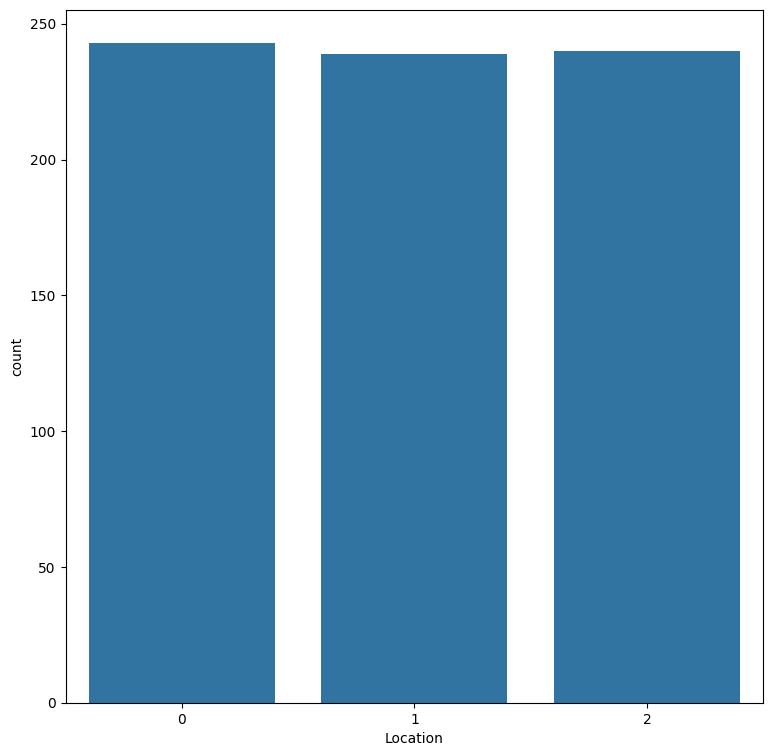

In [134]:
#Location Status
categorical_valcount_hist("Location")

In [135]:
#Data Analysis

<ipython-input-136-40af2e170970>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='Income', data=df, palette='Set1')


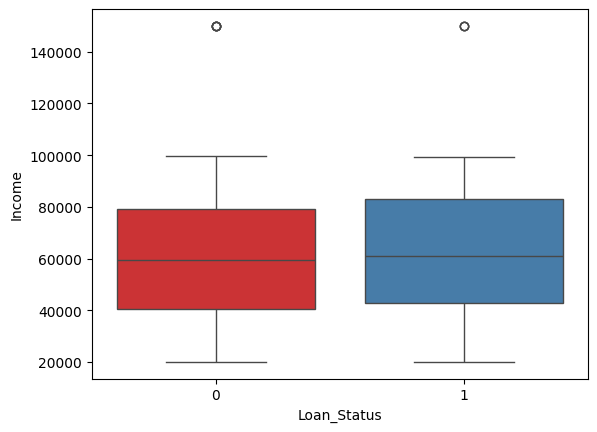

In [136]:
#Comparing relationship between the different data features.
sns.boxplot(x='Loan_Status', y='Income', data=df, palette='Set1')
plt.show()


<ipython-input-137-184277e8d6cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='Age', data=df, palette='Set1')


<Axes: xlabel='Loan_Status', ylabel='Age'>

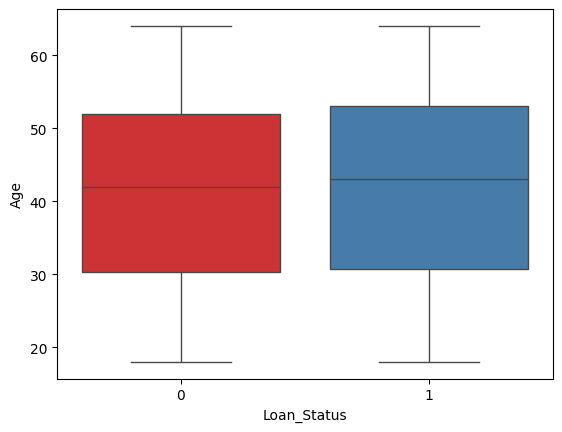

In [137]:
#loan_status & Age
sns.boxplot(x='Loan_Status', y='Age', data=df, palette='Set1')

<ipython-input-138-43650aa35ed2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='Credit_Score', data=df, palette='Set1')


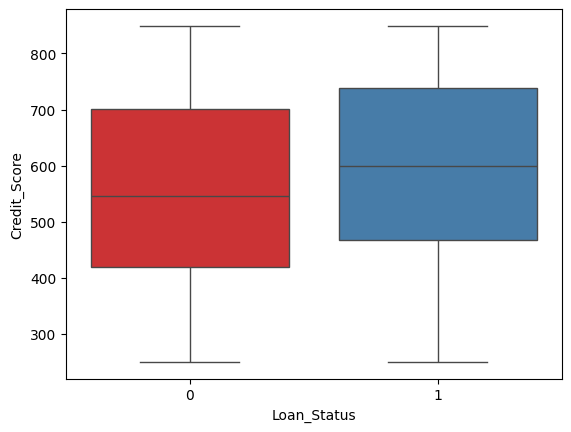

In [138]:
sns.boxplot(x='Loan_Status', y='Credit_Score', data=df, palette='Set1')
plt.show()

<ipython-input-139-60f57d8cd662>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='Debt_to_Income_Ratio', data=df, palette='Set1')


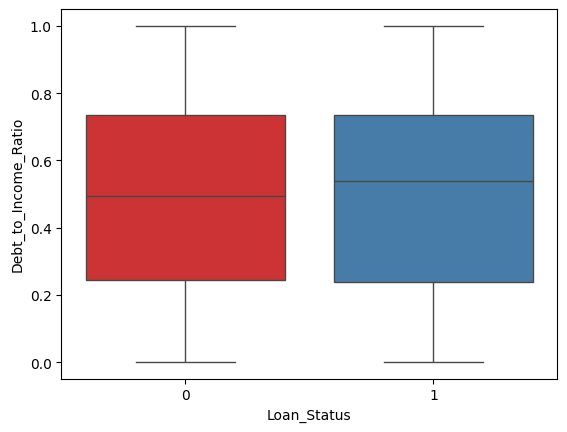

In [139]:
sns.boxplot(x='Loan_Status', y='Debt_to_Income_Ratio', data=df, palette='Set1')
plt.show()

<ipython-input-140-a78faa22a9b0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='Existing_Loan_Balance', data=df, palette='Set1')


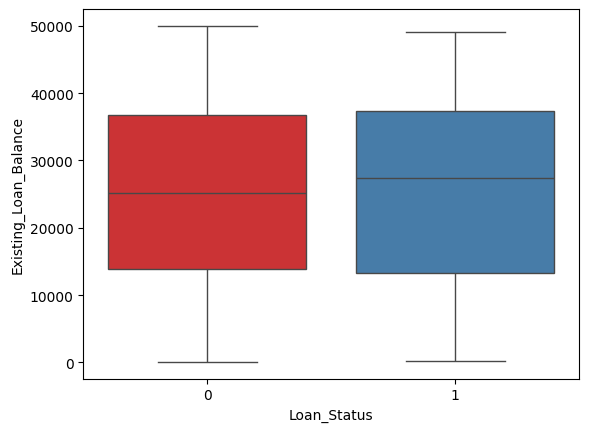

In [140]:
sns.boxplot(x='Loan_Status', y='Existing_Loan_Balance', data=df, palette='Set1')
plt.show()

<ipython-input-141-09bac56d1745>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='Loan_Amount', data=df, palette='Set1')


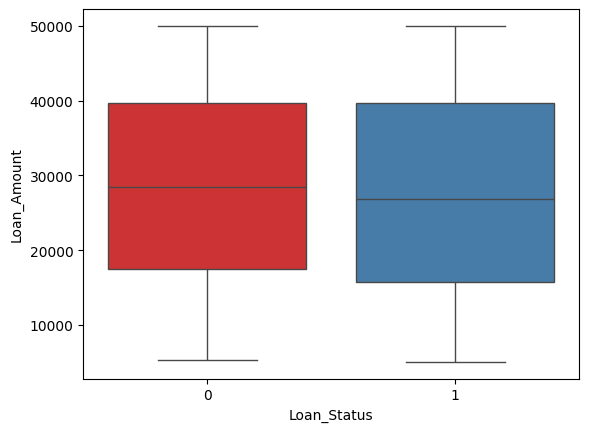

In [141]:
sns.boxplot(x='Loan_Status', y='Loan_Amount', data=df, palette='Set1')
plt.show()

<ipython-input-142-cfacc022b7ad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='Interest_Rate', data=df, palette='Set1')


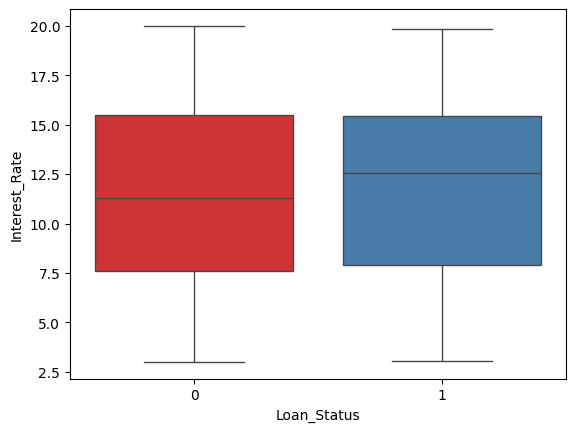

In [142]:
sns.boxplot(x='Loan_Status', y='Interest_Rate', data=df, palette='Set1')
plt.show()

<ipython-input-143-65baf1fe687e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y='Loan_Duration_Months', data=df, palette='Set1')


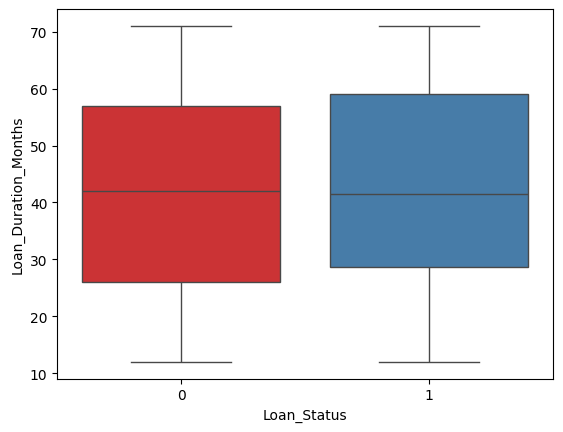

In [143]:
sns.boxplot(x='Loan_Status', y='Loan_Duration_Months', data=df, palette='Set1')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

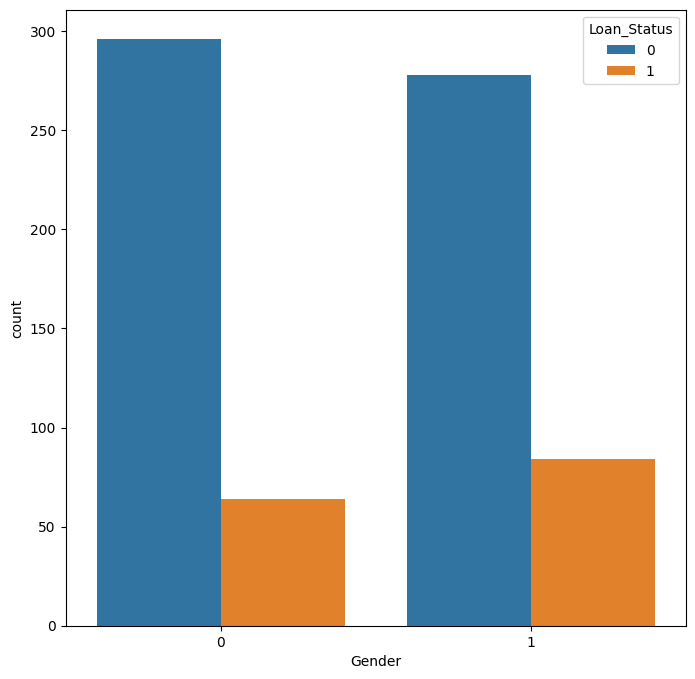

In [144]:
fig, ax = plt.subplots( figsize = (8,8) )
sns.countplot(x='Gender', hue='Loan_Status', ax=ax, data=df)

<Axes: xlabel='Employment_Status', ylabel='count'>

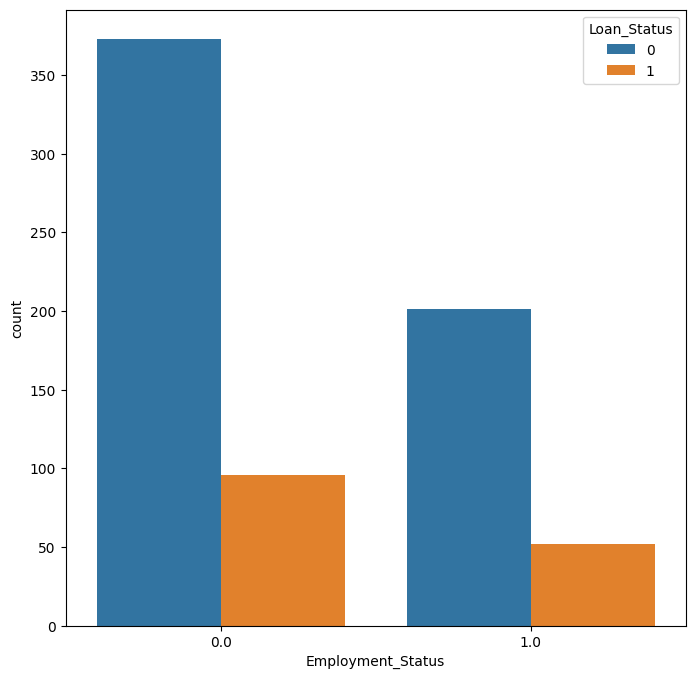

In [145]:
fig, ax = plt.subplots( figsize = (8,8) )
sns.countplot(x='Employment_Status', hue='Loan_Status', ax=ax, data=df)

<Axes: xlabel='Location', ylabel='count'>

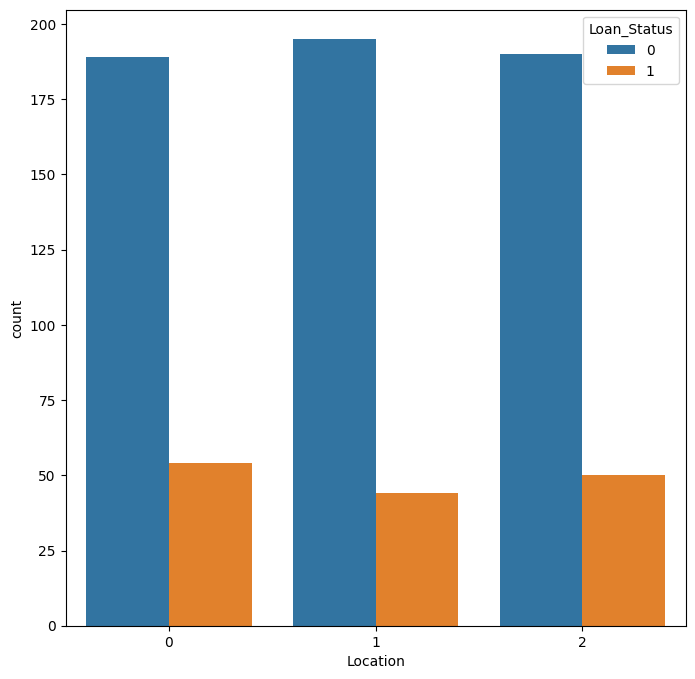

In [146]:
fig, ax = plt.subplots( figsize = (8,8) )
sns.countplot(x='Location', hue='Loan_Status', ax=ax, data=df)

In [147]:
#Encoding

In [148]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [149]:
#LABEL_ENCODER

In [150]:
le = LabelEncoder()
df['Gender_LE'] = le.fit_transform(df['Gender'])
df['Employment_Status_LE'] = le.fit_transform(df['Employment_Status'])
df['Location_LE'] = le.fit_transform(df['Location'])

In [151]:
#ONE_HOT_ENCODER

In [152]:
ohe = OneHotEncoder(sparse_output=False)
gender_ohe = ohe.fit_transform(df[['Gender']])
employment_ohe = ohe.fit_transform(df[['Employment_Status']])
location_ohe = ohe.fit_transform(df[['Location']])



In [153]:
df[['Gender_Male','Gender_Female']]=gender_ohe
df[['Employment_Status_Employed','Employment_Status_Unemployed']]=employment_ohe
df[['Location_Suburban','Location_Urban','Location_Rural']]=location_ohe

In [154]:
#Checking outlier

In [155]:
from scipy import stats
from sklearn.ensemble import IsolationForest


In [156]:
# Numerical outlier detection
numerical_cols = ['Loan_Duration_Months', 'Interest_Rate', 'Loan_Amount',
                  'Existing_Loan_Balance', 'Debt_to_Income_Ratio',
                  'Credit_Score', 'Income', 'Age']

#Z-Score method
for col in numerical_cols:
  z_score=stats.zscore(df[col])
  outlier= np.abs(z_score) > 2
  print(f"outlier in {col}.(Z-score):{df[col][outlier]}")

#IQR Method
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
outliers = (df[col]<(Q1 - 1.5 * IQR)) | (df[col]>(Q3 + 1.5 * IQR))
print(f"Outliers in {col} (IQR): {df[col][outliers]}")

#Isolation Forest
iforest = IsolationForest(contamination=0.01)
iforest.fit(df[[col]])
outliers = iforest.predict(df[[col]])== -1
print(f'Outlier in{col} (Isolation Forest): {df[col][outliers]}')

#Categorical outlier deduction

categorical_col = ['Gender', 'Location', 'Employment_Status']
for col in categorical_col:
  #Frequency Analysis
  freq = df[col].value_counts()
  rare_categories = freq[freq < 5].index
  print(f"Rare categories in {col}: {rare_categories}")

  # Chi-squared test
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df[col], df['Loan_Status'])
chi2,p,dof,_ = chi2_contingency(contingency_table)
print(f"Chi-squared statistic for {col}: {chi2}, p-value: {p}")




outlier in Loan_Duration_Months.(Z-score):Series([], Name: Loan_Duration_Months, dtype: int64)
outlier in Interest_Rate.(Z-score):Series([], Name: Interest_Rate, dtype: float64)
outlier in Loan_Amount.(Z-score):Series([], Name: Loan_Amount, dtype: float64)
outlier in Existing_Loan_Balance.(Z-score):Series([], Name: Existing_Loan_Balance, dtype: float64)
outlier in Debt_to_Income_Ratio.(Z-score):Series([], Name: Debt_to_Income_Ratio, dtype: float64)
outlier in Credit_Score.(Z-score):Series([], Name: Credit_Score, dtype: int64)
outlier in Income.(Z-score):33    150000.0
34    150000.0
35    150000.0
36    150000.0
37    150000.0
38    150000.0
39    150000.0
40    150000.0
Name: Income, dtype: float64
outlier in Age.(Z-score):Series([], Name: Age, dtype: int64)
Outliers in Age (IQR): Series([], Name: Age, dtype: int64)
Outlier inAge (Isolation Forest): Series([], Name: Age, dtype: int64)
Rare categories in Gender: Index([], dtype='int64', name='Gender')
Rare categories in Location: Index

In [157]:
# Define categorical and numerical columns
categorical_cols = ['Gender', 'Location', 'Employment_Status']
numerical_cols = ['Loan_Duration_Months', 'Interest_Rate', 'Loan_Amount',
                  'Existing_Loan_Balance', 'Debt_to_Income_Ratio',
                  'Credit_Score', 'Income', 'Age']
target_col = 'Loan_Status'

all_cols = categorical_cols + numerical_cols

# Split data into features (X) and target (y)
X = df[all_cols]
y = df[target_col]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42,stratify=y)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

X_train shape: (577, 11)
y_train shape: (577,)
X_test shape: (145, 11)
y_test shape: (145,)
Accuracy: 0.7931034482758621
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.99      0.88       115
           1       0.50      0.03      0.06        30

    accuracy                           0.79       145
   macro avg       0.65      0.51      0.47       145
weighted avg       0.74      0.79      0.71       145



In [158]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

#Making predection on the test data
y_pred = model.predict(X_test)

#Evaluateing the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.7724137931034483
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       115
           1       0.00      0.00      0.00        30

    accuracy                           0.77       145
   macro avg       0.39      0.49      0.44       145
weighted avg       0.63      0.77      0.69       145

[[112   3]
 [ 30   0]]
